In [1]:
#Library import
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miguel.d.ferrusca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Loading datasets
df = pd.read_csv("data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
#df2 = pd.read_csv('data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

## Data Exploration

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,sourceURLs,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,reviews.rating.1,Sentiment,Category
0,AVpfhcniLJeJML43-t4G,2015-10-30T10:58:06Z,2019-04-22T10:21:26Z,Expanding Accordion File Folder Plastic Portab...,"B0002LCUZK,B010CEC6MI,B01B25NN64",Amazonbasics,"Office,File Jackets & File Pockets,File Folder...",Office Supplies,https://i.ebayimg.com/images/g/qAwAAOSwptJab16...,expandingaccordionfilefolderplasticportabledoc...,...,NaN,5,http://www.ebay.com/itm/Expanding-File-Tabs-Fo...,https://www.ebay.com/itm/Expanding-Accordion-F...,Exactly what I needed.,Folder,99kurama99,5,Positive,Accuracy
1,AWFFfd9KIwln0LfXiOe0,2018-01-30T04:58:34Z,2019-04-25T04:27:39Z,Fire TV Stick Streaming Media Player Pair Kit,B00ZV9RDKK,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",Electronics,https://static.bhphoto.com/images/smallimages/...,"0848719083781,firetvstickstreamingmediaplayerp...",...,1.0,5,https://www.bhphotovideo.com/c/product/1395909...,https://www.newegg.com/Product/Product.aspx?It...,Pros: Allows you to cut your cable. With many ...,"Quick, Simple, Easy to use and SAVE YOU MONEY!",Cameron G.,5,Positive,Value
2,AWFFfd9KIwln0LfXiOe0,2018-01-30T04:58:34Z,2019-04-25T04:27:39Z,Fire TV Stick Streaming Media Player Pair Kit,B00ZV9RDKK,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",Electronics,https://static.bhphoto.com/images/smallimages/...,"0848719083781,firetvstickstreamingmediaplayerp...",...,1.0,5,https://www.bhphotovideo.com/c/product/1395909...,https://www.newegg.com/Product/Product.aspx?It...,Pros: Very satisfied I am about buy online thi...,Tabrej Ali,Anonymous,5,Positive,Quality
3,AWFFfd9KIwln0LfXiOe0,2018-01-30T04:58:34Z,2019-04-25T04:27:39Z,Fire TV Stick Streaming Media Player Pair Kit,B00ZV9RDKK,Amazon,"Electronics,TVs Entertainment,Featured Brands,...",Electronics,https://static.bhphoto.com/images/smallimages/...,"0848719083781,firetvstickstreamingmediaplayerp...",...,1.0,5,https://www.bhphotovideo.com/c/product/1395909...,https://www.newegg.com/Product/Product.aspx?It...,Pros: I WOULD recommend anyone who was going t...,GREAT! PRICES,Larry T.,5,Positive,Quality
4,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",Amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,5,Neutral,Value


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [5]:
df.shape

(28332, 27)

## Data Cleaning

In [6]:
# Remove null cols

clean_df = df.drop(['reviews.didPurchase','reviews.doRecommend', 'reviews.id', 'reviews.numHelpful'], axis=1)

In [7]:
# Remove non relevant columns

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  28332 non-null  object
 1   dateAdded           28332 non-null  object
 2   dateUpdated         28332 non-null  object
 3   name                28332 non-null  object
 4   asins               28332 non-null  object
 5   brand               28332 non-null  object
 6   categories          28332 non-null  object
 7   primaryCategories   28332 non-null  object
 8   imageURLs           28332 non-null  object
 9   keys                28332 non-null  object
 10  manufacturer        28332 non-null  object
 11  manufacturerNumber  28332 non-null  object
 12  reviews.date        28332 non-null  object
 13  reviews.dateSeen    28332 non-null  object
 14  reviews.rating      28332 non-null  int64 
 15  sourceURLs          28332 non-null  object
 16  reviews.sourceURLs  28

## Initial analysis

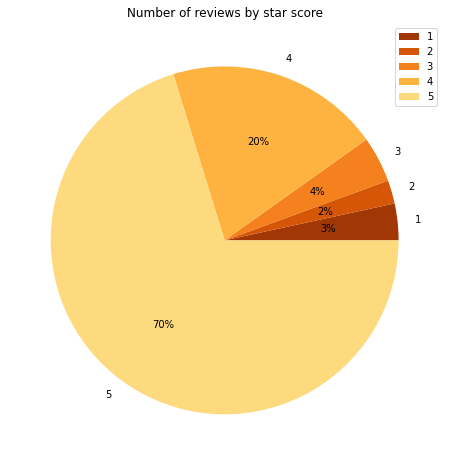

In [8]:
total_reviews = pd.DataFrame(clean_df.groupby(df['reviews.rating.1'])['reviews.text'].agg('count'))

labels = total_reviews.index.to_list()
data = total_reviews['reviews.text']


plt.figure(figsize=(15,8))
colors = sns.color_palette('YlOrBr_r')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("Number of reviews by star score")
plt.legend()
plt.show()

In [9]:
clean_df.groupby(by=['primaryCategories','reviews.rating.1'])['reviews.text'].agg('count')

primaryCategories            reviews.rating.1
Animals & Pet Supplies       3                      1
                             4                      1
                             5                      4
Electronics                  1                    187
                             2                    183
                             3                    551
                             4                   3703
                             5                   9371
Electronics,Furniture        5                      2
Electronics,Media            1                      2
                             2                      2
                             3                      3
                             4                     42
                             5                    136
Health & Beauty              1                    751
                             2                    395
                             3                    534
                             4      

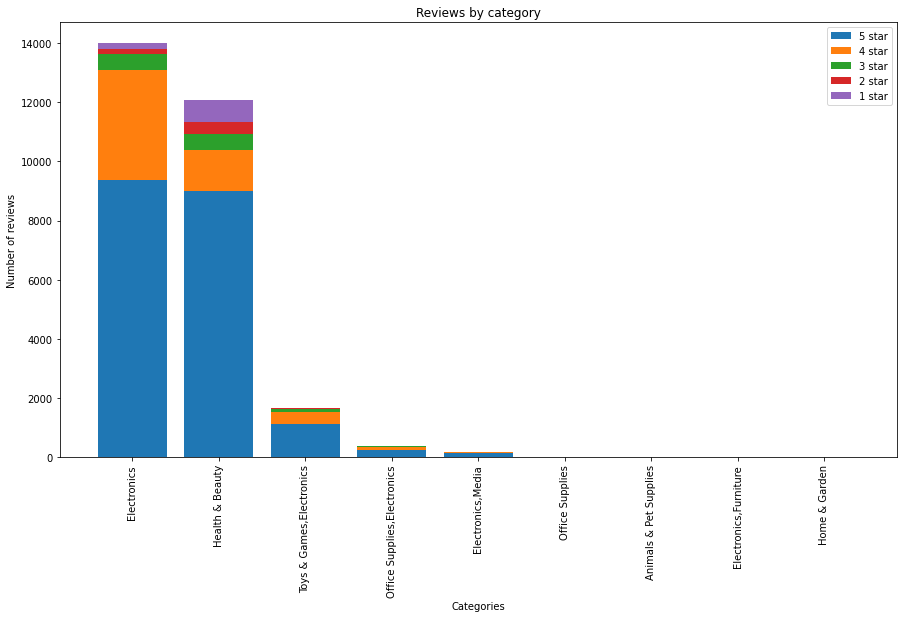

In [10]:
ratings_by_category = clean_df.pivot_table(index= 'primaryCategories', 
                                           columns='reviews.rating.1', 
                                           values= 'reviews.text', 
                                           aggfunc='count').reset_index().fillna(0).sort_values(by=5, ascending=False)

one_star = ratings_by_category[1]
two_star = ratings_by_category[2]
three_star = ratings_by_category[3]
four_star = ratings_by_category[4]
five_star = ratings_by_category[5]
categories = ratings_by_category['primaryCategories']

plt.figure(figsize=(15,8))
plt.bar(categories, five_star, label= '5 star')
plt.bar(categories,four_star, bottom=five_star, label='4 star')
plt.bar(categories, three_star, bottom=(five_star+four_star), label='3 star')
plt.bar(categories, two_star, bottom=(five_star+four_star+three_star), label='2 star')
plt.bar(categories, one_star, bottom=(five_star+four_star+three_star+two_star), label='1 star')


plt.xlabel('Categories')
plt.ylabel('Number of reviews')
#plt.grid(b=None, which='major', axis='y')
plt.title("Reviews by category")
plt.legend()
plt.xticks(rotation=90)

plt.show()


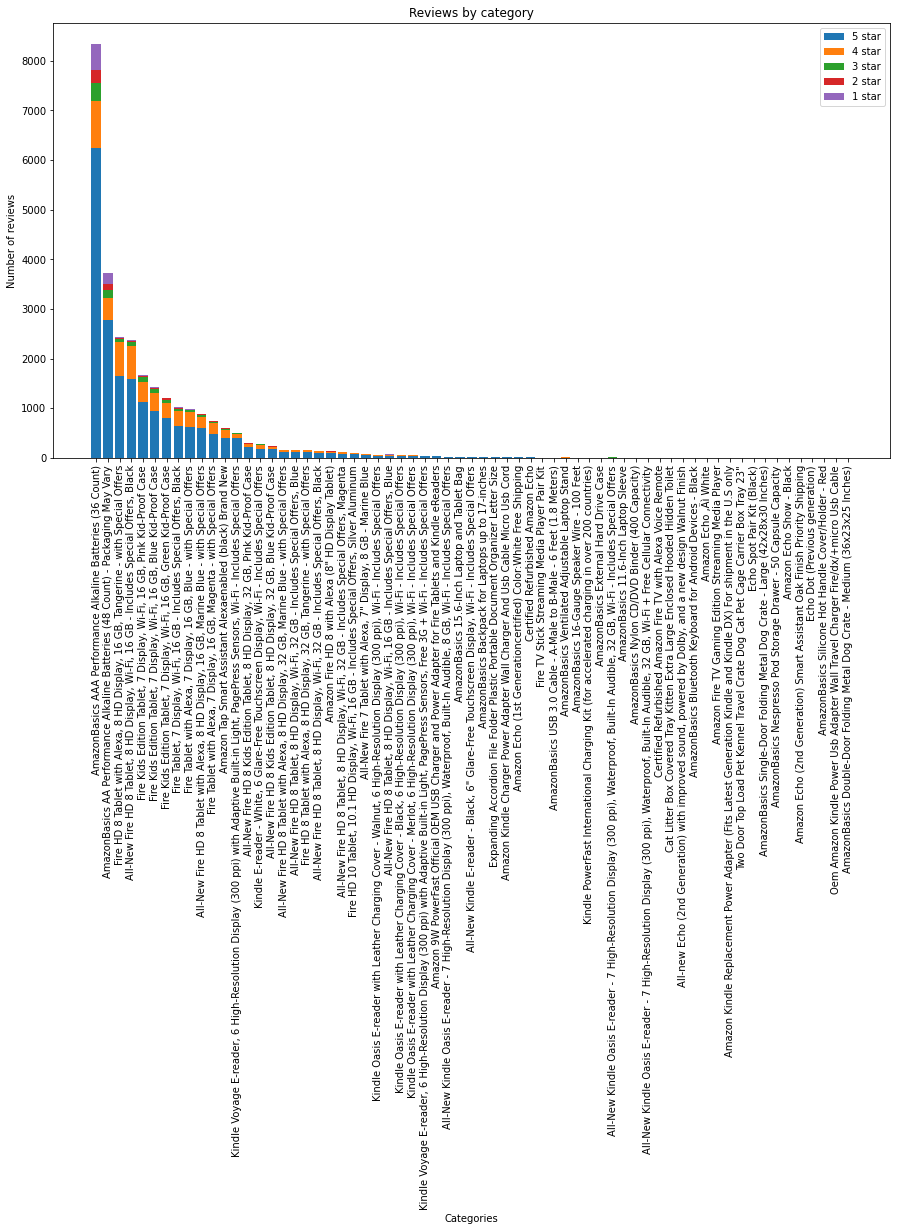

In [11]:
ratings_by_product = clean_df.pivot_table(index= 'name', 
                                           columns='reviews.rating.1', 
                                           values= 'reviews.text', 
                                           aggfunc='count').reset_index().fillna(0).sort_values(by=5, ascending=False)

one_star = ratings_by_product[1]
two_star = ratings_by_product[2]
three_star = ratings_by_product[3]
four_star = ratings_by_product[4]
five_star = ratings_by_product[5]
categories = ratings_by_product['name']

plt.figure(figsize=(15,8))
plt.bar(categories, five_star, label= '5 star')
plt.bar(categories,four_star, bottom=five_star, label='4 star')
plt.bar(categories, three_star, bottom=(five_star+four_star), label='3 star')
plt.bar(categories, two_star, bottom=(five_star+four_star+three_star), label='2 star')
plt.bar(categories, one_star, bottom=(five_star+four_star+three_star+two_star), label='1 star')


plt.xlabel('Categories')
plt.ylabel('Number of reviews')
#plt.grid(b=None, which='major', axis='y')
plt.title("Reviews by category")
plt.legend()
plt.xticks(rotation=90)

plt.show()

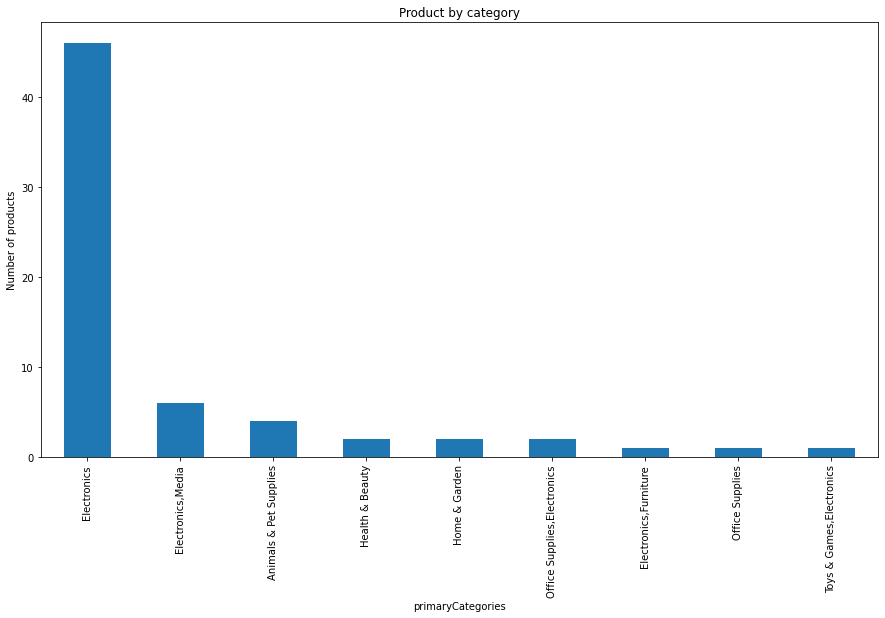

In [12]:
products_by_category = clean_df.groupby(by=['primaryCategories'])['name'].agg('nunique').sort_values(ascending=False)

plt.figure(figsize=(15,8))

plt.xlabel('Category')
plt.ylabel('Number of products')
plt.grid(b=None, which='major', axis='y')
plt.title("Product by category")

products_by_category.plot(kind='bar')
plt.show()

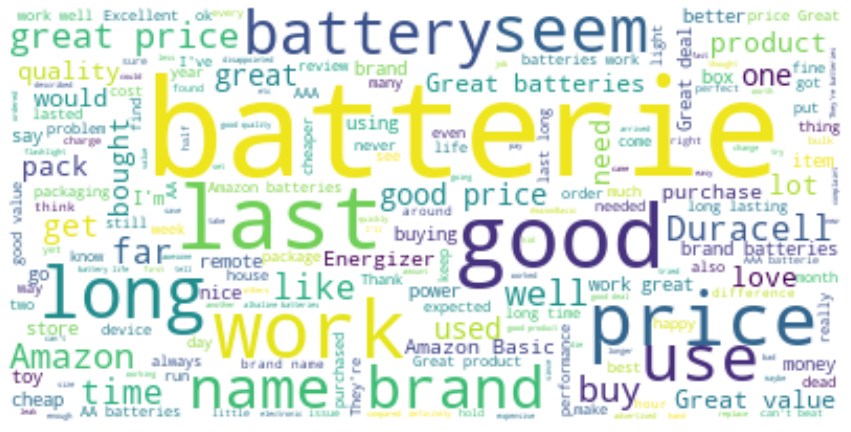

In [13]:
# Plotting wordcloud for product with the most reviews

#Getting reviews for top 1 product and creating a string of words
top_1_reviews = clean_df[clean_df['name']=='AmazonBasics AAA Performance Alkaline Batteries (36 Count)']['reviews.text'].tolist()
top_1_reviews_string = ' '.join(top_1_reviews)

#load stop wwords
stopwords = nltk.corpus.stopwords.words('english')

#Create wordcloud
top_1_wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(top_1_reviews_string)

# Plot wordcloud
plt.figure(figsize=(15,8))
plt.imshow(top_1_wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

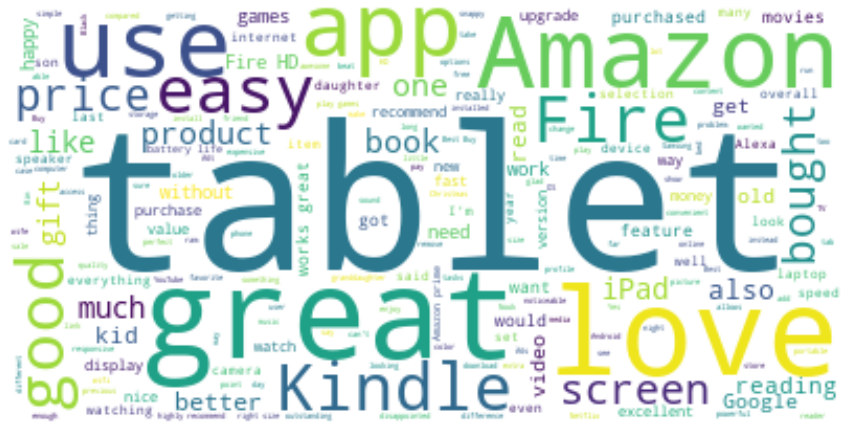

In [14]:
# Plotting wordcloud for product with the most reviews

#Getting reviews for top 1 product and creating a string of words
top_1_reviews = clean_df[clean_df['asins']=='B01J94SWWU']['reviews.text'].tolist()
top_1_reviews_string = ' '.join(top_1_reviews)

#load stop wwords
stopwords = nltk.corpus.stopwords.words('english')

#Create wordcloud
top_1_wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(top_1_reviews_string)

# Plot wordcloud
plt.figure(figsize=(15,8))
plt.imshow(top_1_wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  28332 non-null  object
 1   dateAdded           28332 non-null  object
 2   dateUpdated         28332 non-null  object
 3   name                28332 non-null  object
 4   asins               28332 non-null  object
 5   brand               28332 non-null  object
 6   categories          28332 non-null  object
 7   primaryCategories   28332 non-null  object
 8   imageURLs           28332 non-null  object
 9   keys                28332 non-null  object
 10  manufacturer        28332 non-null  object
 11  manufacturerNumber  28332 non-null  object
 12  reviews.date        28332 non-null  object
 13  reviews.dateSeen    28332 non-null  object
 14  reviews.rating      28332 non-null  int64 
 15  sourceURLs          28332 non-null  object
 16  reviews.sourceURLs  28

In [16]:
reduced_df = clean_df[['asins', 'name', 'reviews.rating.1', 'reviews.text']]

In [29]:
# Getting text polarity and subjectivity

reduced_df['polarity'] = [TextBlob(review).sentiment.polarity for review in reduced_df['reviews.text'].tolist()]
reduced_df['subjectivity'] = [TextBlob(review).sentiment.subjectivity for review in reduced_df['reviews.text'].tolist()]

<ipython-input-29-b9e8d4062135>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['polarity'] = [TextBlob(review).sentiment.polarity for review in reduced_df['reviews.text'].tolist()]
<ipython-input-29-b9e8d4062135>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['subjectivity'] = [TextBlob(review).sentiment.subjectivity for review in reduced_df['reviews.text'].tolist()]


In [19]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   asins             28332 non-null  object 
 1   name              28332 non-null  object 
 2   reviews.rating.1  28332 non-null  int64  
 3   reviews.text      28332 non-null  object 
 4   polarity          28332 non-null  float64
 5   subjectivity      28332 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [20]:
top_1_asin_positive_reviews = reduced_df[
    (reduced_df['asins']=='B018T075DC') & 
    (reduced_df['polarity'] > .33)]['reviews.text'].tolist()

top_1_asin_positive_reviews_string = ' '.join(top_1_asin_positive_reviews)


top_1_asin_negative_reviews = reduced_df[
    (reduced_df['asins']=='B018T075DC') & 
    (reduced_df['polarity'] < -.33)]['reviews.text'].tolist()

top_1_asin_negative_reviews_string = ' '.join(top_1_asin_negative_reviews)

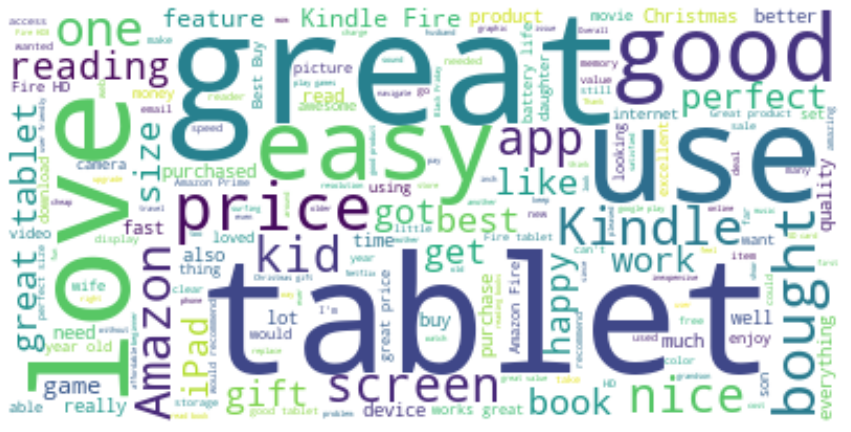

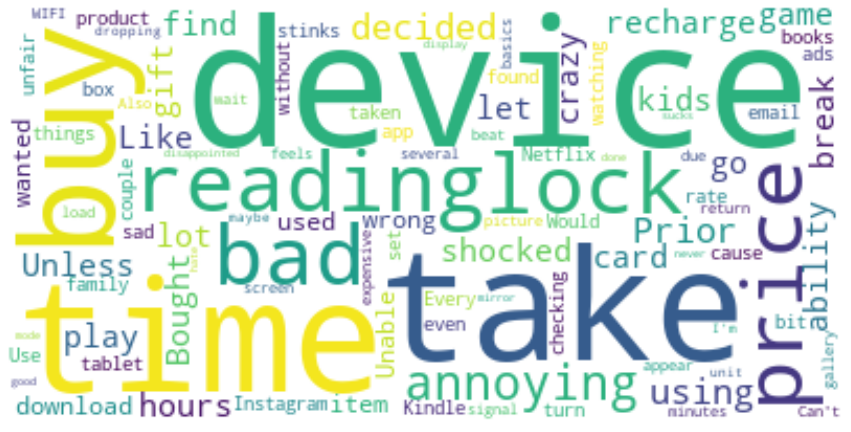

In [21]:
#load stop wwords
stopwords = nltk.corpus.stopwords.words('english')

#Create positive wordcloud
top_1_positive_wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(top_1_asin_positive_reviews_string)

# Plot wordcloud
plt.figure(figsize=(15,8))
plt.imshow(top_1_positive_wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()



#Create negative wordcloud
top_1_negative_wordcloud = WordCloud(background_color='white', stopwords=stopwords).generate(top_1_asin_negative_reviews_string)

# Plot wordcloud
plt.figure(figsize=(15,8))
plt.imshow(top_1_negative_wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()



In [22]:
reduced_df.groupby(reduced_df['asins'])['reviews.text'].agg('count').sort_values(ascending=False)

asins
B00QWO9P0O,B00LH3DMUO               8343
B00QWO9P0O,B01IB83NZG,B00MNV8E0C    3728
B018T075DC                          2443
B018SZT3BK,B01AHB9CN2               2370
B018Y226XO                          1676
                                    ... 
B010RLCH2U                             1
B00OP6SMCI                             1
B00QAVO43C                             1
B00VKTZFB4                             1
B01J24C0TI                             1
Name: reviews.text, Length: 65, dtype: int64

In [23]:
clean_df[clean_df['name'] == 'AmazonBasics AAA Performance Alkaline Batteries (36 Count)']

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.rating,sourceURLs,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,reviews.rating.1,Sentiment,Category
1758,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,1,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,First eight batteries I tried barely had a cha...,Very Poor,ByTFC111,1,NaN,NaN
1765,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,5,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,"High quality, long lasting, fast delivery. And...",Can't beat that!,ByDonn Koonce,5,NaN,NaN
1766,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,2,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,they dont last long at all not worth buying,DONT BUY,ByHunter J.,2,NaN,NaN
1767,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,5,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,Amazing!,Five Stars,ByDaniele Tarticchio,5,NaN,NaN
1768,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,5,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,Cheap price and nice quality.,Five Stars,ByEric,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28151,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,5,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,Decent price for the grand kid's toys. Last a ...,Last a good time.,ByAlonzo,5,NaN,NaN
28152,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,2017-08-28T00:00:00Z,3,"https://www.barcodable.com/upc/841710106442,ht...",https://www.amazon.com/product-reviews/B00QWO9...,They do not last as long as other batteries. :...,Three 

<AxesSubplot:xlabel='reviews.rating.1', ylabel='polarity'>

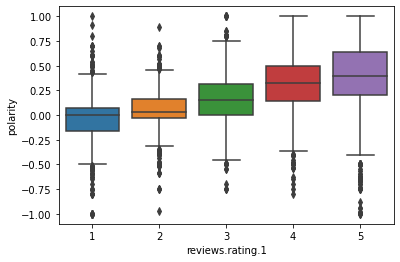

In [31]:
sns.boxplot(x=reduced_df['reviews.rating.1'], y=reduced_df['polarity'])

In [35]:
from amazon_product_review_scraper import amazon_product_review_scraper
review_scraper = amazon_product_review_scraper(amazon_site="amazon.com", product_asin="B0963FW7PL")
reviews_df = review_scraper.scrape()
reviews_df.head(5)

AttributeError: 'NoneType' object has no attribute 'tbody'